This Jupyter Notebook builds upon the referenced [Google Colab](https://colab.research.google.com/drive/1QzQYQxH052Rs088rxMQDveRjoVdkdl74?usp=sharing), integrating customized modifications to address the specific requirements of our testing.

# 1. Load Multimodal Data

## 1.1. Extract and Partition Text, Tables, and Images

In [1]:
# Remove existing figures
!rm -rf ./figures

In [2]:
import os
from langchain_community.document_loaders import UnstructuredPDFLoader

# Directory containing the PDFs
pdf_dir = './references'

# Collect all PDF files from the directory and subdirectories, excluding hidden ones
pdf_files = []
for root, dirs, files in os.walk(pdf_dir):
    # Exclude hidden directories
    dirs[:] = [d for d in dirs if not d.startswith('.')]
    for file in files:
        # Exclude hidden files
        if file.lower().endswith('.pdf') and not file.startswith('.'):
            pdf_files.append(os.path.join(root, file))

# Initialize an empty list to hold data from all PDFs
data = []

# Loop through each PDF file and load it
for pdf_file in pdf_files:
    print(f'Loading {pdf_file}')
    loader = UnstructuredPDFLoader(
        file_path=pdf_file,
        strategy='hi_res',
        extract_images_in_pdf=True,
        infer_table_structure=True,
        chunking_strategy="by_title",     # section-based chunking
        max_characters=4000,              # max size of chunks
        new_after_n_chars=4000,           # preferred size of chunks
        combine_text_under_n_chars=2000,  # combine smaller chunks
        mode='elements',
        image_output_dir_path='./figures'
    )
    data.extend(loader.load())

Loading ./references/Sample 1.pdf


/home/shihchi_liu/RAG/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
docs = []
tables = []

for doc in data:
    if doc.metadata['category'] == 'Table':
        tables.append(doc)
    elif doc.metadata['category'] == 'CompositeElement':
        docs.append(doc)

len(docs), len(tables)

(5, 2)

In [4]:
import htmltabletomd

for table in tables:
    table.page_content = htmltabletomd.convert_table(table.metadata['text_as_html'])

## 1.2. Examine Loaded Data (Optional)

In [5]:
from IPython.display import HTML, display, Markdown, Image

In [6]:
docs[0]

Document(metadata={'source': './references/Sample 1.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2024-04-09T21:27:48', 'page_number': 1, 'orig_elements': 'eJzFWG1v3DYS/ivEAgfYwFIhJUqiDPSD68AHH3BpUae4D7nAICVqxVYrCXpxsi363ztDatfyZls0BtYJgsQckTPDmeE8z/jD7ytTm61pxgdbrK7IKuJ5HCpVUh5lkoqCKyqZLKlSykidR5FQ2WpNVlszqkKNCs78vsrbti9so0YzuHWtdu00PlTGbqoRJGHIGJyZxZ9sMVYg5amTdq1tRjz34QNPWAAiHmQf12S/CuM0SNw6jrIgPSHA/bBeDbthNFu8xY/2s6nvO5Wb1R/wobS1GXedcZ9+/C/6b7dqYx465TxZvanarXkzVLbKK/tQ2+nNT9f/flPazdSbYf6fcsqDX7rNyt2k2UygwLm9Ms1m9dFJh/Fh2xa2tMYFM2ShoAz+Zu9DfhWmV0Li6Q5NN9NWmx7DgB6O5jMGaqUU+f8UMi6+I3dN2fZb22zIWBlSm40dajXaR0MKoyHUZLBNbgjPuCA3bbMBTwfbNqomP5nBqD6vyL3pHy3EAA3M17/De2NQjhNfyCQsyrCgoWScijzmVAktqSryODG6MCYqzpf4MEt9asWc+70g40Hscy3gp1MCd+Rv01+Y0eQjxOYhhxQND13fatjGAlCRxKfr42wZ/rmD6JmC/GdqIHngPwujZYLeqb53aX6PB04kSsdRUupUUWXSgooyhMep04jmiZYyTDNTqvjcLzSUWSAWbzQSkC1cx3EURF+u/f6XJUmKJElfOUn/s3VR2t6Q+xFyMYw2H5Y5em/H+uQjSrIwLeMSumeqNBVZoSm8HE3TpEyiKOO6zMW5cxNJFkSL3EgW+1zJS

In [7]:
print(tables[0].page_content)

| | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- |
|  | 2018 | 2019 | 2020 | 2021 | 2022 |
| Number of Fires (thousands) |
| Federal | 12.5 | 10.9 | 14.4 | 14.0 | 11.7 |
| FS | 5.6 | 5.3 | 6.7 | 6.2 | 59 |
| Dol | 7.0 | 5.3 | 7.6 | 7.6 | 5.8 |
| Other | 0.1 | 0.2 | &lt;0.1 | 0.2 | 0.1 |
| Nonfederal | 45.6 | 39.6 | 44.6 | 45.0 | $7.2 |
| Total | 58.1 | 50.5 | 59.0 | 59.0 | 69.0 |
| Acres Burned (millions) |
| Federal | 4.6 | 3.1 | 7.1 | 5.2 | 40 |
| FS | 2.3 | 0.6 | 48 | 41 | 19 |
| Dol | 2.3 | 2.3 | 2.3 | 1.0 | 2.1 |
| Other | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 |
| Nonfederal | 4.1 | 1.6 | 3.1 | Lg | 3.6 |
| Total | 8.8 | 4.7 | 10.1 | 7.1 | 7.6 |



In [8]:
tables[0].metadata['text_as_html']

'<table><tr><td/><td>2018</td><td>2019</td><td>2020</td><td>2021</td><td>2022</td></tr><tr><td>Number of Fires (thousands)</td></tr><tr><td>Federal</td><td>12.5</td><td>10.9</td><td>14.4</td><td>14.0</td><td>11.7</td></tr><tr><td>FS</td><td>5.6</td><td>5.3</td><td>6.7</td><td>6.2</td><td>59</td></tr><tr><td>Dol</td><td>7.0</td><td>5.3</td><td>7.6</td><td>7.6</td><td>5.8</td></tr><tr><td>Other</td><td>0.1</td><td>0.2</td><td>&lt;0.1</td><td>0.2</td><td>0.1</td></tr><tr><td>Nonfederal</td><td>45.6</td><td>39.6</td><td>44.6</td><td>45.0</td><td>$7.2</td></tr><tr><td>Total</td><td>58.1</td><td>50.5</td><td>59.0</td><td>59.0</td><td>69.0</td></tr><tr><td>Acres Burned (millions)</td></tr><tr><td>Federal</td><td>4.6</td><td>3.1</td><td>7.1</td><td>5.2</td><td>40</td></tr><tr><td>FS</td><td>2.3</td><td>0.6</td><td>48</td><td>41</td><td>19</td></tr><tr><td>Dol</td><td>2.3</td><td>2.3</td><td>2.3</td><td>1.0</td><td>2.1</td></tr><tr><td>Other</td><td>&lt;0.1</td><td>&lt;0.1</td><td>&lt;0.1</td><

In [9]:
display(Markdown(tables[0].metadata['text_as_html']))

<table><tr><td/><td>2018</td><td>2019</td><td>2020</td><td>2021</td><td>2022</td></tr><tr><td>Number of Fires (thousands)</td></tr><tr><td>Federal</td><td>12.5</td><td>10.9</td><td>14.4</td><td>14.0</td><td>11.7</td></tr><tr><td>FS</td><td>5.6</td><td>5.3</td><td>6.7</td><td>6.2</td><td>59</td></tr><tr><td>Dol</td><td>7.0</td><td>5.3</td><td>7.6</td><td>7.6</td><td>5.8</td></tr><tr><td>Other</td><td>0.1</td><td>0.2</td><td>&lt;0.1</td><td>0.2</td><td>0.1</td></tr><tr><td>Nonfederal</td><td>45.6</td><td>39.6</td><td>44.6</td><td>45.0</td><td>$7.2</td></tr><tr><td>Total</td><td>58.1</td><td>50.5</td><td>59.0</td><td>59.0</td><td>69.0</td></tr><tr><td>Acres Burned (millions)</td></tr><tr><td>Federal</td><td>4.6</td><td>3.1</td><td>7.1</td><td>5.2</td><td>40</td></tr><tr><td>FS</td><td>2.3</td><td>0.6</td><td>48</td><td>41</td><td>19</td></tr><tr><td>Dol</td><td>2.3</td><td>2.3</td><td>2.3</td><td>1.0</td><td>2.1</td></tr><tr><td>Other</td><td>&lt;0.1</td><td>&lt;0.1</td><td>&lt;0.1</td><td>&lt;0.1</td><td>&lt;0.1</td></tr><tr><td>Nonfederal</td><td>4.1</td><td>1.6</td><td>3.1</td><td>Lg</td><td>3.6</td></tr><tr><td>Total</td><td>8.8</td><td>4.7</td><td>10.1</td><td>7.1</td><td>7.6</td></tr></table>

In [10]:
for table in tables:
    print(table.page_content)
    print()

| | | | | | |
| :--- | :--- | :--- | :--- | :--- | :--- |
|  | 2018 | 2019 | 2020 | 2021 | 2022 |
| Number of Fires (thousands) |
| Federal | 12.5 | 10.9 | 14.4 | 14.0 | 11.7 |
| FS | 5.6 | 5.3 | 6.7 | 6.2 | 59 |
| Dol | 7.0 | 5.3 | 7.6 | 7.6 | 5.8 |
| Other | 0.1 | 0.2 | &lt;0.1 | 0.2 | 0.1 |
| Nonfederal | 45.6 | 39.6 | 44.6 | 45.0 | $7.2 |
| Total | 58.1 | 50.5 | 59.0 | 59.0 | 69.0 |
| Acres Burned (millions) |
| Federal | 4.6 | 3.1 | 7.1 | 5.2 | 40 |
| FS | 2.3 | 0.6 | 48 | 41 | 19 |
| Dol | 2.3 | 2.3 | 2.3 | 1.0 | 2.1 |
| Other | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 |
| Nonfederal | 4.1 | 1.6 | 3.1 | Lg | 3.6 |
| Total | 8.8 | 4.7 | 10.1 | 7.1 | 7.6 |


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |




In [11]:
! ls -l ./figures

total 144
-rw-r--r-- 1 shihchi_liu shihchi_liu 27929 Nov 18 20:23 figure-1-1.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu 27182 Nov 18 20:23 figure-1-2.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu 26589 Nov 18 20:23 figure-1-3.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu 26448 Nov 18 20:23 figure-2-4.jpg
-rw-r--r-- 1 shihchi_liu shihchi_liu 29260 Nov 18 20:23 figure-2-5.jpg


In [12]:
Image('./figures/figure-5-4.jpg')

FileNotFoundError: No such file or directory: './figures/figure-5-4.jpg'

FileNotFoundError: No such file or directory: './figures/figure-5-4.jpg'

<IPython.core.display.Image object>

# 2. Connect to LLM through API

In [13]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key:  ········


In [14]:
os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [15]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0)

# 3. Generate Text-Based Summaries for Multimodal Data

## 3.1. Create Text and Table Summaries

In [16]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text particularly for semantic retrieval.
These summaries will be embedded and used to retrieve the raw text or table elements.
Give a detailed summary of the table or text below that is well optimized for retrieval.
For any tables also add in a one line description of what the table is about besides the summary.
Do not add additional words like Summary: etc.

Table or text chunk:
{element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = (
                    {"element": RunnablePassthrough()}
                      |
                    prompt
                      |
                    chatgpt
                      |
                    StrOutputParser() # Extracts the response as text and returns it as a string
)

# Initialize empty summaries
text_summaries = []
table_summaries = []

text_docs = [doc.page_content for doc in docs]
table_docs = [table.page_content for table in tables]

text_summaries = summarize_chain.batch(text_docs, {"max_concurrency": 5})
table_summaries = summarize_chain.batch(table_docs, {"max_concurrency": 5})

len(text_summaries), len(table_summaries)

(5, 2)

## 3.2. Examine Text and Table Summaries (Optional)

In [17]:
text_summaries[0]

'The table provides an overview of wildfire statistics in the United States, detailing the number of wildfires and acres burned annually from 1993 to 2022. Wildfires include unplanned fires caused by lightning, unauthorized human activities, and escaped prescribed burns. State and federal responsibilities for wildfire response are outlined, with the Forest Service managing 193 million acres of the National Forest System and the Department of the Interior overseeing over 400 million acres of various public lands. Data from the National Interagency Coordination Center (NICC) shows a slight decrease in the number of wildfires over the past 30 years, while the acreage burned has generally increased. From 2000 to 2022, an average of 70,025 wildfires burned 7.0 million acres annually, compared to 78,600 fires and 3.3 million acres in the 1990s. Between 2013 and 2022, the average was 61,410 wildfires and 7.2 million acres annually. In 2022, 68,988 wildfires burned 7.6 million acres, with over

In [18]:
table_summaries[0]

'The table provides data on the number of fires and acres burned from 2018 to 2022, categorized by federal and nonfederal sources. For the number of fires (in thousands), federal fires ranged from 10.9 to 14.4 thousand, with a notable increase in FS fires to 59 thousand in 2022. Nonfederal fires varied from 39.6 to 45.6 thousand, with a significant drop to $7.2 thousand in 2022. Total fires ranged from 50.5 to 69.0 thousand. For acres burned (in millions), federal acres burned ranged from 3.1 to 7.1 million, with a spike in FS acres to 48 million in 2020. Nonfederal acres burned varied, with a large value in 2021, and total acres burned ranged from 4.7 to 10.1 million. The table highlights trends and anomalies in fire occurrences and their impact over the years.'

## 3.3. Create Image Summaries

In [19]:
import base64
from langchain_core.messages import HumanMessage

# Create a function to encode images
def encode_image(image_path):
    # Get the base64 string
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# Create image summaries
def image_summarize(img_base64, prompt):
    chat = ChatOpenAI(model="gpt-4o", temperature=0)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval.
                Remember these images could potentially contain graphs, charts or tables also.
                These summaries will be embedded and used to retrieve the raw image for question answering.
                Give a detailed summary of the image that is well optimized for retrieval.
                Do not add additional words like Summary: etc.
             """

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries

# Image summaries
IMG_PATH = './figures'
imgs_base64, image_summaries = generate_img_summaries(IMG_PATH)

len(imgs_base64), len(image_summaries)

(5, 5)

## 3.4. Examine Image Summaries (Optional)

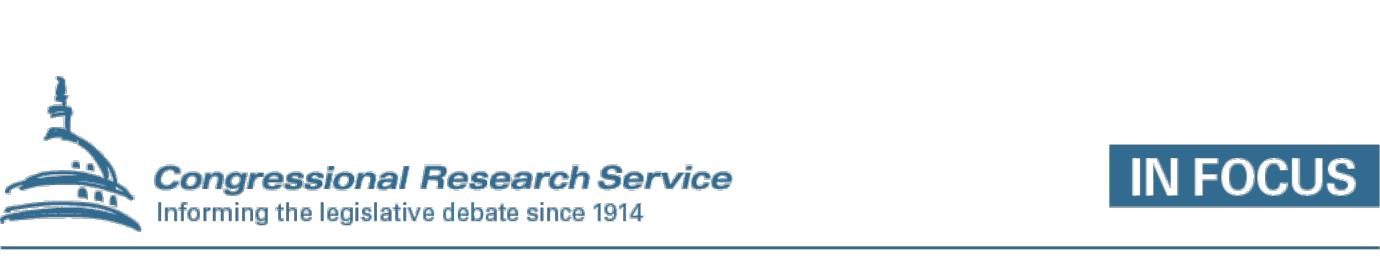

In [20]:
display(Image('./figures/figure-1-1.jpg'))

In [21]:
image_summaries[0]

'The image features the logo and header of the Congressional Research Service, which includes an illustration of the U.S. Capitol dome. The text reads "Congressional Research Service" with the tagline "Informing the legislative debate since 1914." On the right side, there is a blue box with the words "IN FOCUS." The design is simple, with a blue and white color scheme.'

# 4. Build Multi-Vetor Retrievers: Multimodal and Single-Modal

## 4.1. Access Embedding Model

In [22]:
from langchain_openai import OpenAIEmbeddings

openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-large')

## 4.2. Create Utility Functions

In [23]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.storage import RedisStore
from langchain_community.utilities.redis import get_client
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

# Create retriever that indexes summaries, but returns raw images or texts
def create_multi_vector_retriever(
    docstore, vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):

    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=docstore,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever

## 4.3. Initiate Vectorstores: Chroma

In [24]:
# The vectorstore to use to index the summaries and their embeddings
chroma_db_multimodal = Chroma(
    collection_name="mm_rag",
    embedding_function=openai_embed_model,
    collection_metadata={"hnsw:space": "cosine"},
)

# The vectorstore for single-modal RAG
chroma_db_single_modal = Chroma(
    collection_name="text_rag",
    embedding_function=openai_embed_model,
    collection_metadata={"hnsw:space": "cosine"},
)

## 4.4. Initiate Docstores: Redis and InMemoryStore

In JupyterLab's terminal (File > New > Terminal), run the following commands:

```bash
# 1. Import the GPG key for the Redis repository
curl -fsSL https://packages.redis.io/gpg | sudo gpg --dearmor -o /usr/share/keyrings/redis-archive-keyring.gpg

# 2. Add the Redis repository to your sources list
echo "deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] \
https://packages.redis.io/deb $(lsb_release -cs) main" | \
sudo tee /etc/apt/sources.list.d/redis.list

# 3. Update package lists
sudo apt-get update

# 4. Install Redis Stack Server
sudo apt-get install redis-stack-server

# 5. Start Redis Stack Server in the background
redis-stack-server --daemonize yes
```

In [25]:
# Initialize the storage layer - to store raw images, text and tables
client = get_client('redis://localhost:6379')
redis_store = RedisStore(client=client) # Can use filestore, memorystory, any other DB store also

from langchain.storage import InMemoryStore

# Initialize the storage layer for the single-modal retriever
docstore_single_modal = InMemoryStore()

## 4.5. Create Retrievers

In [27]:
retriever_multimodal = create_multi_vector_retriever(
    redis_store,
    chroma_db_multimodal,
    text_summaries,
    text_docs,
    table_summaries,
    table_docs,
    image_summaries,
    imgs_base64,
)

retriever_multimodal

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0xff287009fb80>, docstore=<langchain_community.storage.redis.RedisStore object at 0xff287009e6e0>, search_kwargs={})

In [28]:
retriever_single_modal = create_multi_vector_retriever(
    docstore_single_modal,
    chroma_db_single_modal,
    text_summaries,
    text_docs,
    table_summaries=[],  # Empty lists since we're only using text
    tables=[],
    image_summaries=[],  # No images
    images=[],
)

# Verify the single-modal retriever
retriever_single_modal

MultiVectorRetriever(vectorstore=<langchain_chroma.vectorstores.Chroma object at 0xff287009f2b0>, docstore=<langchain_core.stores.InMemoryStore object at 0xff2864d50d60>, search_kwargs={})

# 5. Prepare for Retrieval

## 5.1. Setup Retrieval Display

In [29]:
from IPython.display import HTML, display, Markdown, Image
from PIL import Image
import base64
from io import BytesIO

# Disply base64 encoded string as image
def plt_img_base64(img_base64):
    # Decode the base64 string
    img_data = base64.b64decode(img_base64)
    # Create a BytesIO object
    img_buffer = BytesIO(img_data)
    # Open the image using PIL
    img = Image.open(img_buffer)
    display(img)

In [30]:
import re
import base64

def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []
    for doc in docs:
        # Get the content
        if isinstance(doc, Document):
            doc_content = doc.page_content
        else:
            doc_content = doc
        # Ensure doc_content is a string
        if isinstance(doc_content, bytes):
            doc_str = doc_content.decode('utf-8')
        else:
            doc_str = doc_content  # already a string
        if looks_like_base64(doc_str) and is_image_data(doc_str):
            b64_images.append(doc_str)
        else:
            texts.append(doc_str)
    return {"images": b64_images, "texts": texts}

## 5.2. Examine Retrievals (Optional)

In [ ]:
# Check retrieval
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
docs = retriever_multimodal.invoke(query, limit=5)

# We get 4 docs
len(docs)

In [ ]:
docs

In [ ]:
is_image_data(docs[1].decode('utf-8'))

In [ ]:
r = split_image_text_types(docs)
r

In [ ]:
plt_img_base64(docs[1].decode('utf-8'))

# 6. Construct End-to-End RAG Pipeline

## 6.1. Chain RAG Components Altogether

In [31]:
from operator import itemgetter
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.messages import HumanMessage

def multimodal_prompt_function(data_dict):
    """
    Create a multimodal prompt with both text and image context.

    This function formats the provided context from `data_dict`, which contains
    text, tables, and base64-encoded images. It joins the text (with table) portions
    and prepares the image(s) in a base64-encoded format to be included in a message.

    The formatted text and images (context) along with the user question are used to
    construct a prompt for GPT-4o
    """
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            f"""You are an analyst tasked with understanding detailed information and trends from text documents,
                data tables, and charts and graphs in images.
                You will be given context information below which will be a mix of text, tables, and images usually of charts or graphs.
                Use this information to provide answers related to the user question.
                Do not make up answers, use the provided context documents below and answer the question to the best of your ability.

                User question:
                {data_dict['question']}

                Context documents:
                {formatted_texts}

                Answer:
            """
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

## 6.2. Implement RAG for QA

In [32]:
# Create RAG chain
rag = (
        {
            "context": itemgetter('context'),
            "question": itemgetter('input'),
        }
            |
        RunnableLambda(multimodal_prompt_function)
            |
        chatgpt
            |
        StrOutputParser()
)

In [33]:
def rag_qa(query, retriever):

    # Pass input query to retriever and get context document elements
    retrieve_docs = (itemgetter('input')
                        |
                    retriever
                        |
                    RunnableLambda(split_image_text_types))
    
    # Below, we chain `.assign` calls. This takes a dict and successively
    # adds keys-- "context" and "answer"-- where the value for each key
    # is determined by a Runnable (function or chain executing at runtime).
    # This helps in also having the retrieved context along with the answer generated by GPT-4o
    rag_w_sources = (RunnablePassthrough.assign(context=retrieve_docs)
                                        .assign(answer=rag)
    )

    response = rag_w_sources.invoke({'input': query})
    print('=='*50)
    print('Answer:')
    display(Markdown(response['answer']))
    print('--'*50)
    print('Sources:')
    text_sources = response['context']['texts']
    img_sources = response['context']['images']
    for text in text_sources:
        display(Markdown(text))
        print()
    for img in img_sources:
        plt_img_base64(img)
        print()
    print('=='*50)

In [34]:
def no_rag_qa(query):
    # Create a prompt that only includes the user's question
    messages = [
        HumanMessage(content=f"You are an assistant that answers questions based solely on the input provided.\n\nUser question:\n{query}\n\nAnswer:")
    ]
    
    response = chatgpt.invoke(messages)
    print('=='*50)
    print('Answer:')
    display(Markdown(response.content))
    print('=='*50)

## 6.3. Examine Multimodal RAG (Optional)

In [ ]:
query = "Tell me about the annual wildfires trend with acres burned"
rag_qa(query, retriever_multimodal)

In [ ]:
query = "Tell me about the number of acres burned by wildfires for the forest service in 2021"
rag_qa(query, retriever_multimodal)

In [ ]:
query = "Tell me about the percentage of residences burned by wildfires in 2022"
rag_qa(query, retriever_multimodal)

## 6.4. Examine Single-Modal RAG (Optional)

In [ ]:
query = "Tell me about the annual wildfires trend with acres burned"
rag_qa(query, retriever_single_modal)

In [ ]:
query = "Tell me about the number of acres burned by wildfires for the forest service in 2021"
rag_qa(query, retriever_single_modal)

In [ ]:
query = "Tell me about the percentage of residences burned by wildfires in 2022"
rag_qa(query, retriever_single_modal)

## 6.5. Examine No-RAG (Optional)

In [ ]:
query = "Tell me about the annual wildfires trend with acres burned"
no_rag_qa(query)

In [ ]:
query = "Tell me about the number of acres burned by wildfires for the forest service in 2021"
no_rag_qa(query)

In [ ]:
query = "Tell me about the percentage of residences burned by wildfires in 2022"
no_rag_qa(query)

# 7. Query Energy Advisor Exam Questions

## 7.1. Read the Excel File

In [194]:
import pandas as pd
import re
import base64
import os
from io import BytesIO, StringIO
from PIL import Image as PILImage
from IPython.display import display, Markdown, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import logging

# Step 1: Configure the root logger to suppress all logs below CRITICAL
# This should be done before importing other libraries to ensure suppression takes effect
logging.basicConfig(level=logging.CRITICAL, format='%(levelname)s: %(message)s')

# Step 2: Completely disable specific external library loggers
logging.getLogger('openai').disabled = True
logging.getLogger('urllib3').disabled = True
logging.getLogger('requests').disabled = True
logging.getLogger('httpx').disabled = True
# If there are other external libraries producing unwanted logs, disable them similarly
# Example:
# logging.getLogger('some_other_library').disabled = True

# Step 3: Create a dedicated logger for your application to handle warnings
logger = logging.getLogger('EA_Exam_Processor')
logger.setLevel(logging.WARNING)  # Only WARNING and above will be handled

# Path to the Excel file
excel_file_path = './EA QAs/EA QAs.xlsx'

# Read the Excel file into a DataFrame
questions_df = pd.read_excel(excel_file_path, sheet_name='EA QAs')

# Ensure the columns are correct
# Since logging is suppressed, use print for essential information if needed
print("Columns in the Excel file:", questions_df.columns)

Columns in the Excel file: Index(['#', 'Question', 'Image', 'Option', 'Answer'], dtype='object')


## 7.2. Define Helper Functions

In [195]:
def extract_answer(text):
    """
    Extracts the agent's answer, ensuring it is one of (A), (B), (C), or (D).
    Returns the uppercase letter if found, otherwise logs a warning and returns None.
    """
    # Normalize the text
    text = text.strip().upper()
    
    # Use regex to find standalone A, B, C, or D, possibly followed by punctuation
    match = re.search(r'\b([ABCD])\b', text)
    if match:
        return match.group(1)
    
    # Additional checks: look for patterns like "Answer: A" or "A)"
    match = re.search(r'ANSWER[:\s]*([ABCD])', text)
    if match:
        return match.group(1)
    
    match = re.search(r'\b([ABCD])[).\s]', text)
    if match:
        return match.group(1)
    
    return None

In [196]:
def encode_image(image_path, max_size=(400, 400)):
    """
    Encodes an image file to a Base64 string after resizing it to a maximum size.
    """
    try:
        with PILImage.open(image_path) as img:
            # Resize the image while maintaining aspect ratio
            img.thumbnail(max_size, PILImage.LANCZOS)
            # Save the image to a BytesIO object
            buffered = BytesIO()
            img.save(buffered, format="JPEG", quality=85)
            # Encode the image to Base64 and decode to string
            img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
            return img_str
    except FileNotFoundError:
        # Log a warning if the image file is not found
        logger.warning(f"Image file {image_path} not found.")
        return None
    except Exception as e:
        # Log any other exceptions
        logger.warning(f"Error encoding image {image_path}: {e}")
        return None

In [197]:
def resize_base64_image(img_base64, max_size=(400, 400)):
    """
    Resizes a Base64-encoded image to the specified maximum size.
    """
    try:
        img_data = base64.b64decode(img_base64)
        img = PILImage.open(BytesIO(img_data))
        img.thumbnail(max_size, PILImage.LANCZOS)
        buffered = BytesIO()
        img.save(buffered, format="JPEG", quality=85)
        resized_img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
        return resized_img_str
    except Exception as e:
        # Log any exceptions during resizing
        logger.warning(f"Error resizing image: {e}")
        return img_base64  # Return original if resizing fails

In [198]:
def looks_like_base64(s):
    """
    Checks if a string looks like base64-encoded data.
    """
    s = s.strip()
    if s.startswith('data:image'):
        s = s.split(',', 1)[1]
    # Base64 strings have lengths that are multiples of 4
    if len(s) % 4 != 0:
        return False
    # Check if it's valid base64
    try:
        base64.b64decode(s, validate=True)
        return True
    except Exception:
        return False

In [199]:
def is_image_data(s):
    """
    Checks if the base64 data represents an image.
    """
    try:
        img_data = base64.b64decode(s)
        img = PILImage.open(BytesIO(img_data))
        img.verify()
        return True
    except Exception:
        return False

In [200]:
def detect_markdown_table(text):
    """
    Detects if the text contains a Markdown-formatted table.
    """
    lines = text.strip().split('\n')
    if len(lines) >= 2:
        # Check for header separator line (e.g., | --- | --- |)
        header_line = lines[1].strip()
        if re.match(r'^\s*\|?\s*:-{1,}\s*(\|\s*:-{1,}\s*)+\|?\s*$', header_line):
            return True
    return False

In [201]:
def split_docs_into_images_texts_tables(docs):
    """
    Splits documents into images, texts, and tables.
    """
    images = []
    texts = []
    tables = []
    for doc in docs:
        # Extract content and metadata
        if isinstance(doc, Document):
            content = doc.page_content
            metadata = doc.metadata
        else:
            content = doc
            metadata = {}
    
        # Ensure content is a string
        if isinstance(content, bytes):
            content = content.decode('utf-8', errors='ignore')
    
        # Extract category from metadata
        category = metadata.get('category', '').lower()
    
        # Check if the document is a table based on metadata or content
        if category == 'table':
            tables.append({'content': content, 'metadata': metadata})
            continue
        elif '<table' in content.lower():
            tables.append({'content': content, 'metadata': metadata})
            continue
        elif detect_markdown_table(content):
            tables.append({'content': content, 'metadata': metadata})
            continue
    
        # Remove data URL prefix if present
        if content.startswith('data:image'):
            content = content.split(',', 1)[1]
    
        # Check if content is an image
        if looks_like_base64(content) and is_image_data(content):
            images.append(content)
        else:
            texts.append(content)
    return {'images': images, 'texts': texts, 'tables': tables}

In [202]:
def display_base64_image(img_base64):
    """
    Displays a Base64-encoded image using matplotlib.
    """
    try:
        img_data = base64.b64decode(img_base64)
        img = mpimg.imread(BytesIO(img_data), format='JPEG')
        plt.figure(figsize=(6,6))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        logger.warning(f"Error displaying image: {e}")

## 7.3. Modify RAG Functions

In [203]:
def rag_multiple_choice_qa(question, options, retriever, image_base64=None):
    """
    Answers a multiple-choice question using the given retriever.
    Returns the answer (A, B, C, or D) and the sources.
    """
    # Retrieve relevant documents
    retrieved_docs = retriever.get_relevant_documents(question)
    
    # Split documents into images, texts, and tables
    sources = split_docs_into_images_texts_tables(retrieved_docs)
    
    # Limit text sources to 100 words
    def limit_text_length(text, max_words=100):
        words = text.split()
        return ' '.join(words[:max_words])
    
    sources['texts'] = [limit_text_length(text) for text in sources['texts']]
    
    # Build the prompt
    formatted_texts = "\n".join(sources['texts'])
    context_text = f"Context documents:\n{formatted_texts}"
    
    # Build the prompt with clear instructions
    prompt_text = f"""You are an assistant that answers multiple-choice questions based solely on the input provided.
You will be given a question, several options, and context documents, which may include text, HTML tables, and images.
Use the context documents to choose the correct option.
Respond with only the letter of the chosen option: A, B, C, or D. Do not provide any additional text.

User question:
{question}

Options:
{options}

{context_text}

Answer:"""
    
    # Prepare the messages
    messages = []
    
    # Include the question image if provided
    if image_base64:
        resized_image_base64 = resize_base64_image(image_base64)
        messages.append({
            "role": "user",
            "content": "(Image attached)",
            "attachments": [resized_image_base64]
        })
    
    # Add images from retrieved sources
    for image_data in sources['images']:
        resized_img_base64 = resize_base64_image(image_data)
        messages.append({
            "role": "system",
            "content": "(Image attached)",
            "attachments": [resized_img_base64]
        })
    
    # Add tables from retrieved sources
    for table_dict in sources['tables']:
        table_content = table_dict['content']
        if isinstance(table_content, bytes):
            table_content = table_content.decode('utf-8', errors='ignore')
        messages.append({
            "role": "system",
            "content": table_content
        })
    
    # Add the main prompt
    messages.append({
        "role": "user",
        "content": prompt_text
    })
    
    # Send the messages to the LLM
    try:
        response = chatgpt.invoke(messages)
    except Exception as e:
        logger.warning(f"Error invoking chatgpt: {e}")
        return 'Invalid', sources
    
    # Extract the answer
    answer_text = response.content.strip()
    answer = extract_answer(answer_text)
    
    # If answer is None, log the issue and set to 'Invalid'
    if answer is None:
        logger.warning(f"Invalid answer extracted for question '{question_number}': '{answer_text}'")
        # Optionally, implement a retry mechanism here
        answer = 'Invalid'
    
    return answer, sources

In [204]:
def no_rag_multiple_choice_qa(question, options, image_base64=None):
    """
    Answers a multiple-choice question without retrieval (no RAG).
    Returns the answer (A, B, C, or D).
    """
    # Build the prompt with clear instructions
    prompt_text = f"""You are an assistant that answers multiple-choice questions based solely on the input provided.
You will be given a question and several options.
Choose the correct option from the given options, and respond with only the letter of the chosen option: A, B, C, or D. Do not provide any additional text.

User question:
{question}

Options:
{options}

Answer:"""
    
    # Prepare the messages
    messages = []
    
    # Include the question image if provided
    if image_base64:
        resized_image_base64 = resize_base64_image(image_base64)
        messages.append({
            "role": "user",
            "content": "(Image attached)",
            "attachments": [resized_image_base64]
        })
    
    # Add the main prompt
    messages.append({
        "role": "user",
        "content": prompt_text
    })
    
    # Send the messages to the LLM
    try:
        response = chatgpt.invoke(messages)
    except Exception as e:
        logger.warning(f"Error invoking chatgpt: {e}")
        return 'Invalid'
    
    # Extract the answer
    answer_text = response.content.strip()
    answer = extract_answer(answer_text)
    
    # If answer is None, log the issue and set to 'Invalid'
    if answer is None:
        logger.warning(f"Invalid answer: '{answer_text}'")
        # Optionally, implement a retry mechanism here
        answer = 'Invalid'
    
    return answer

## 7.4. Process Each Question and Collect Responses

[EA-ENVIRO-009]
------------------------------
(D): True answer

(C): Multimodal RAG - WRONG
(B): Single-modal RAG - WRONG
(B): No-RAG - WRONG
------------------------------
Question:
The following is not mandatory equipment for evaluations:

Options:
(A) Thermometer
(B) Low-emissivity window coating detector
(C) Compass
(D) Hygrometer
------------------------------
Multimodal RAG Sources:
Image Source 1:


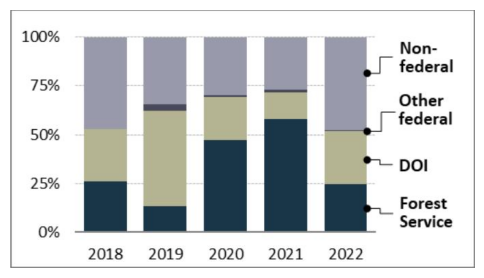


Image Source 2:


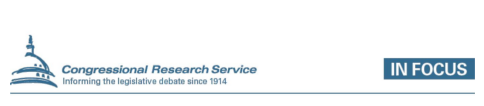


Image Source 3:


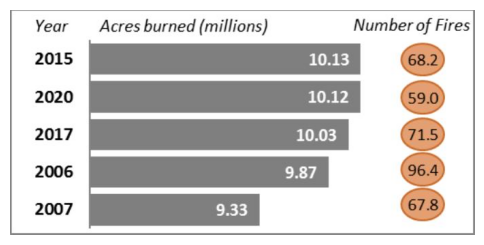


[EA-ENVIRO-010]
------------------------------
(A): True answer

(C): Multimodal RAG - WRONG
(C): Single-modal RAG - WRONG
(B): No-RAG - WRONG
------------------------------
Question:
The following best describes the subject of an N evaluation:

Options:
(A) A house that has been occupied for less than six months
(B) A house that had upgrades performed subsequent to a previous Basic Service
(C) A house that has been occupied for six months or more
(D) A multi-unit building that has been occupied for six months or more
------------------------------
Multimodal RAG Sources:
Text Source 1:


Source: National Interagency Coordination Center (NICC) 2022 Year Number of Fires Acres burned (millions) 2015 2020 2017 2006 2007 Source: NICC Wildland Fire Summary and Statistics annual reports. Note: Number of fires in thousands. The number of fires and acreage burned are indicators of the annual level of wildfire activity. These numbers may not be indicative of fire’s impact on human development or communities, since many fires occur in large, relatively undeveloped areas. Acreage burned also does not indicate the severity of a wildfire, the degree of impact upon forests or soils, or other ecological effects. Most wildfires are human-caused


Image Source 1:


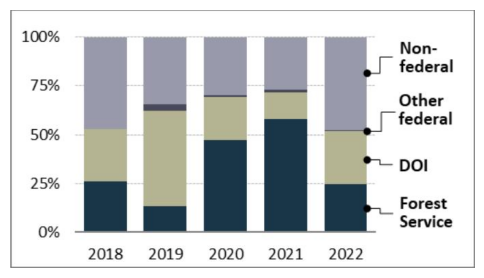


Image Source 2:


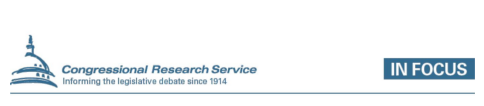

[EA-ENVIRO-011]
------------------------------
(C): True answer

(C): Multimodal RAG - CORRECT
(Invalid): Single-modal RAG - WRONG
(C): No-RAG - CORRECT
------------------------------
Question:
What is the R value of the attic insulation in the photo, assuming the average depth is 11"?


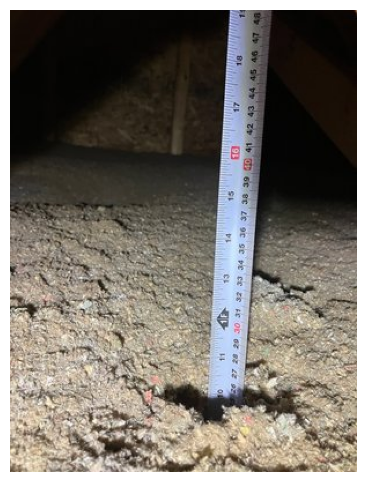


Options:
(A) R20
(B) R28
(C) R40
(D) R36
------------------------------
Multimodal RAG Sources:
Image Source 1:


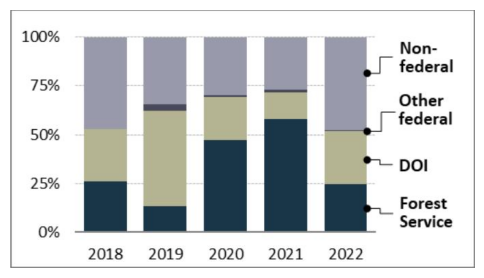


Image Source 2:


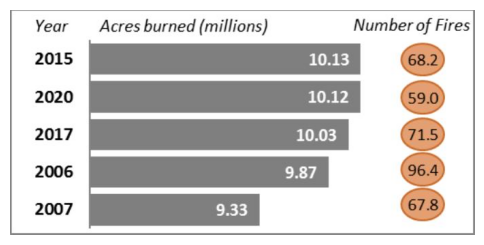


Image Source 3:


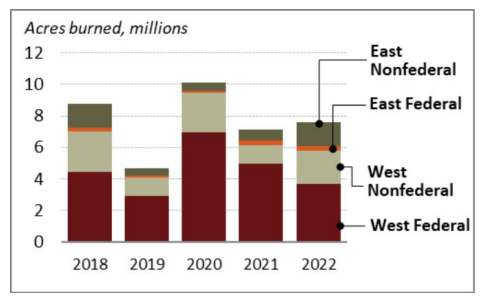


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |


[F-CIET-001]
------------------------------
(A): True answer

(A): Multimodal RAG - CORRECT
(Invalid): Single-modal RAG - WRONG
(B): No-RAG - WRONG
------------------------------
Question:
Calculate the heated floor area based on the interior wall dimensions presented below. The walls have a thickness of 0.3 m (1.0 ft.).


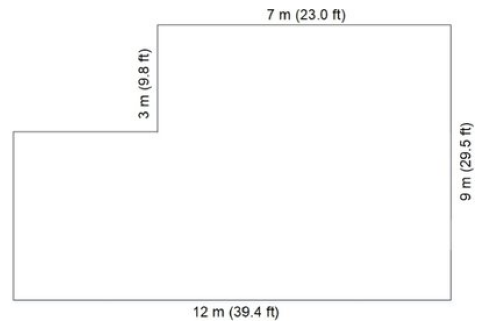


Options:
(A) 93 m² (1,001 ft²)
(B) 69 m² (743 ft²)
(C) 73 m² (786 ft²)
(D) 68 m² (732 ft²)
------------------------------
Multimodal RAG Sources:
Image Source 1:


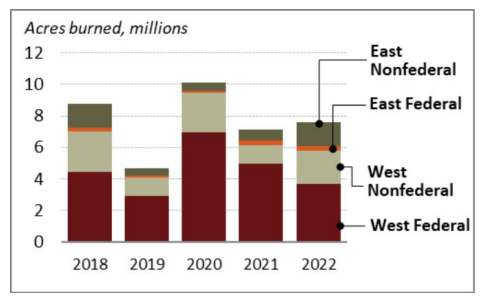


Image Source 2:


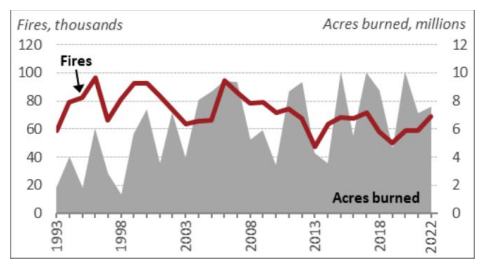


Image Source 3:


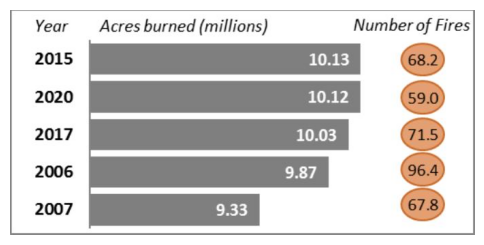


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |



[F-CIET-002]
------------------------------
(C): True answer

(A): Multimodal RAG - WRONG
(A): Single-modal RAG - WRONG
(A): No-RAG - WRONG
------------------------------
Question:
Calculate the heated floor area based on the lengths of the interior walls presented below. The walls have a thickness of 0.3 m (1.0 ft.).


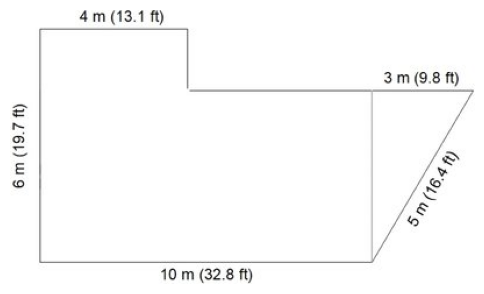


Options:
(A) 52 m² (560 ft²)
(B) 38 m² (409 ft²)
(C) 54 m² (581 ft²)
(D) 40 m² (431 ft²)
------------------------------
Multimodal RAG Sources:
Image Source 1:


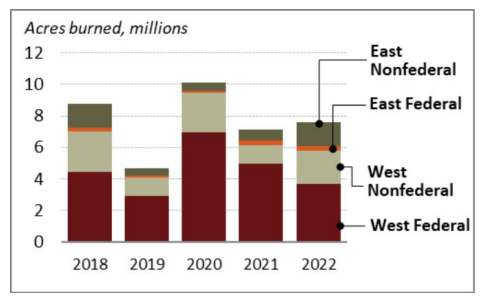


Image Source 2:


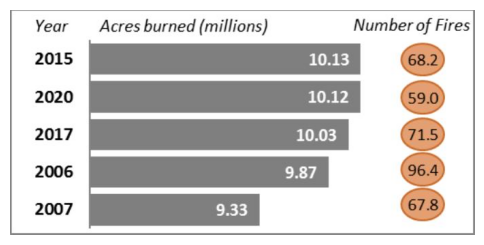


Image Source 3:


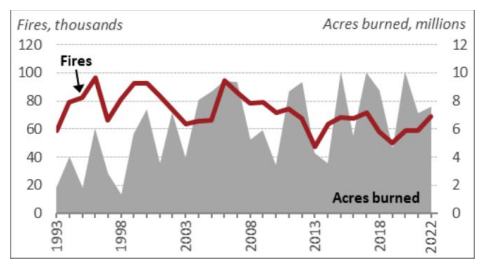


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |



[F-CIET-003]
------------------------------
(C): True answer

(A): Multimodal RAG - WRONG
(A): Single-modal RAG - WRONG
(A): No-RAG - WRONG
------------------------------
Question:
Calculate the heated floor area based on the lengths of the exterior walls presented below. The walls have a thickness of 0.3 m (1.0 ft.).


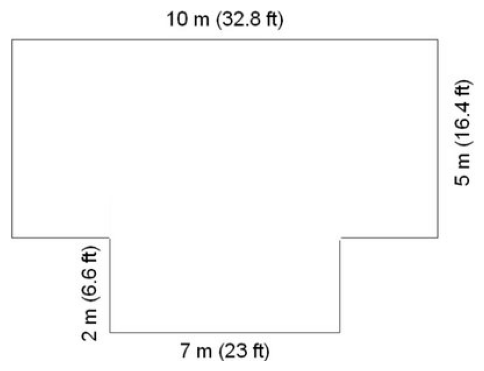


Options:
(A) 64 m² (689 ft²)
(B) 48 m² (517 ft²)
(C) 54 m² (581 ft²)
(D) 57 m² (614 ft²)
------------------------------
Multimodal RAG Sources:
Image Source 1:


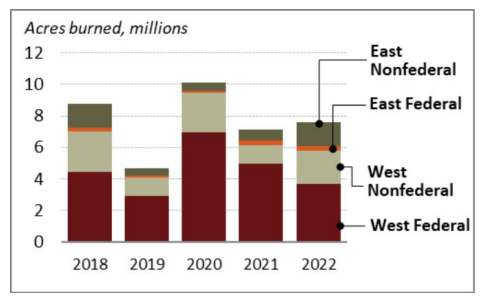


Image Source 2:


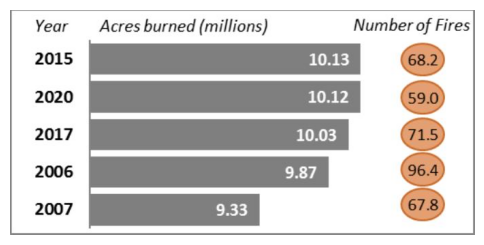


Image Source 3:


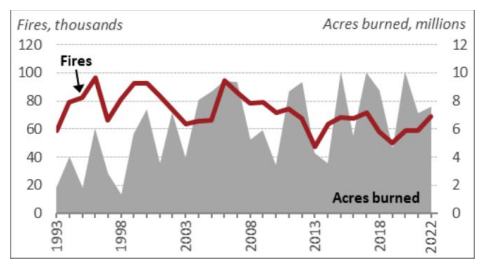


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |



[F-CIET-004]
------------------------------
(B): True answer

(B): Multimodal RAG - CORRECT
(B): Single-modal RAG - CORRECT
(B): No-RAG - CORRECT
------------------------------
Question:
A roof has a run of 6 feet and a rise of 3 feet. What is its slope?

Options:
(A) 6/3
(B) 1/2
(C) 3/12
(D) 12/3
------------------------------
Multimodal RAG Sources:
Image Source 1:


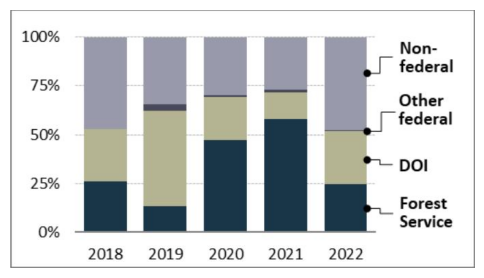


Image Source 2:


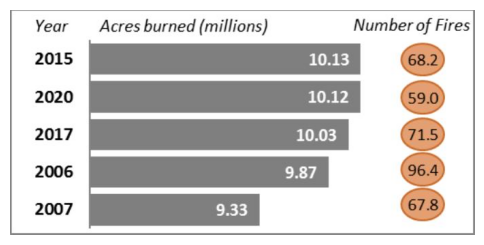


Image Source 3:


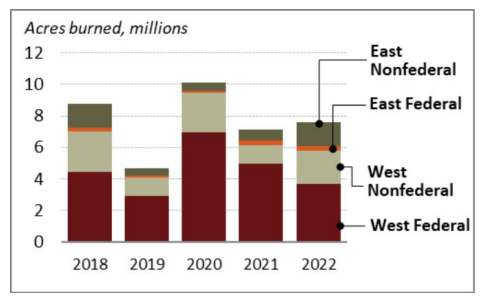


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |



[F-CIET-005]
------------------------------
(C): True answer

(A): Multimodal RAG - WRONG
(A): Single-modal RAG - WRONG
(A): No-RAG - WRONG
------------------------------
Question:
A roof has a rise of 10 feet and a span of 20 feet. What is its slope?

Options:
(A) 1/2
(B) 20/10
(C) 1/1
(D) 5/20
------------------------------
Multimodal RAG Sources:
Image Source 1:


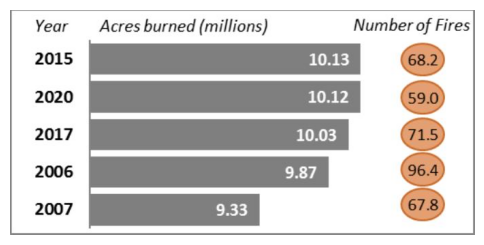


Image Source 2:


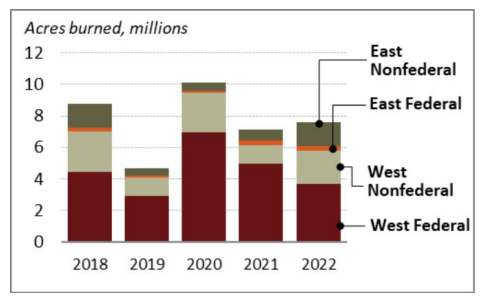


Image Source 3:


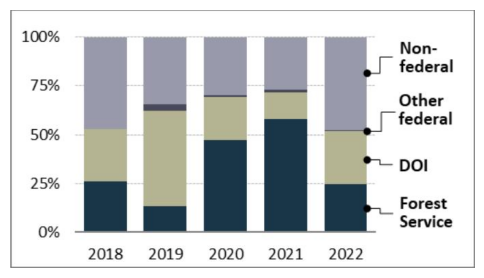


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |



[F-CIET-006]
------------------------------
(A): True answer

(C): Multimodal RAG - WRONG
(C): Single-modal RAG - WRONG
(C): No-RAG - WRONG
------------------------------
Question:
A roof has a rafter with a length of 25 feet and a rise of 15 feet. What is its slope?

Options:
(A) 3/4
(B) 5/4
(C) 4/5
(D) 4/3
------------------------------
Multimodal RAG Sources:
Image Source 1:


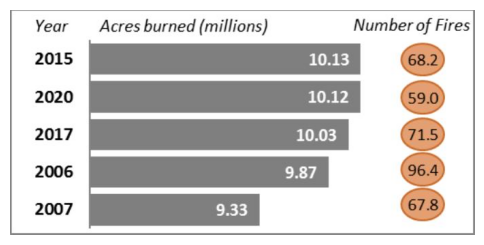


Image Source 2:


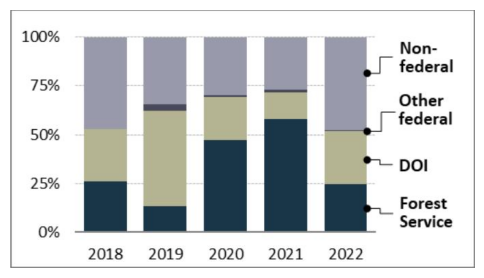


Image Source 3:


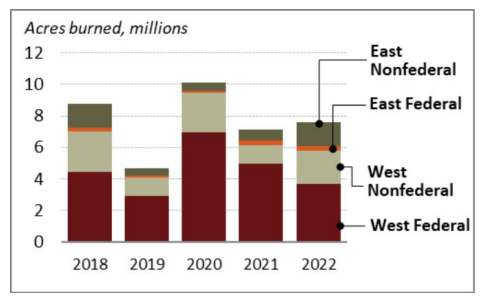


Table Source 1:


| | | | | |
| :--- | :--- | :--- | :--- | :--- |
|  | 2019 | 2020 | 2021 | 2022 |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |


In [206]:
# Main loop to process the questions
for idx, row in questions_df.iterrows():
    question_number = row['#']
    question_text = row['Question']
    image_needed = row['Image']
    options_text = row['Option']
    true_answer = row['Answer']

    # Load image if needed
    image_base64 = None
    if str(image_needed).strip().upper() == 'TRUE':
        image_path = os.path.join('EA QAs', f"{question_number}.jpg")
        image_base64 = encode_image(image_path, max_size=(400, 400))  # Adjust size as needed

    # Multimodal RAG agent
    mm_answer, mm_sources = rag_multiple_choice_qa(
        question_text, options_text, retriever_multimodal, image_base64
    )

    # Single-modal RAG agent
    sm_answer, sm_sources = rag_multiple_choice_qa(
        question_text, options_text, retriever_single_modal, image_base64=image_base64
    )

    # No-RAG agent
    nr_answer = no_rag_multiple_choice_qa(
        question_text, options_text, image_base64
    )

    # Compare answers to true answer
    mm_correct = 'CORRECT' if mm_answer == true_answer else 'WRONG'
    sm_correct = 'CORRECT' if sm_answer == true_answer else 'WRONG'
    nr_correct = 'CORRECT' if nr_answer == true_answer else 'WRONG'

    # Display the results
    print(f"[{question_number}]")
    print("-"*30)
    print(f"({true_answer}): True answer\n")
    print(f"({mm_answer}): Multimodal RAG - {mm_correct}")
    print(f"({sm_answer}): Single-modal RAG - {sm_correct}")
    print(f"({nr_answer}): No-RAG - {nr_correct}")
    print("-"*30)
    print("Question:")
    print(question_text)
    if image_base64:
        display_base64_image(image_base64)
    print("\nOptions:")
    print(options_text)
    print("-"*30)
    print("Multimodal RAG Sources:")
    text_sources = mm_sources['texts']
    image_sources = mm_sources['images']
    table_sources = mm_sources['tables']
    
    # Display text sources
    for i, text in enumerate(text_sources):
        print(f"Text Source {i+1}:")
        display(Markdown(text))
        print()
    
    # Display image sources
    for i, img_base64 in enumerate(image_sources):
        print(f"Image Source {i+1}:")
        display_base64_image(img_base64)
        print()
    
    # Display table sources
    for i, table_dict in enumerate(table_sources):
        print(f"Table Source {i+1}:")
        table_content = table_dict['content']
        # Try to parse and display as HTML table
        try:
            # Wrap the HTML content in a StringIO object
            tables = pd.read_html(StringIO(table_content))
            for table in tables:
                display(table)
        except ValueError:
            # If parsing fails, try to render as Markdown table
            try:
                display(Markdown(table_content))
            except Exception:
                # If all else fails, display the raw content
                print(table_content)
        print()
    
    print("="*100)